# Tensors

* A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.
* Similar to Numpy Arrays, but designed to work on GPU's (compared to regular CPU's)
* default data type of **float32**
* More suitable for deep learning than a numpy array

In [3]:
import torch
import numpy as np

# List

* We have python list, works with most use cases.
* Then comes numpy arrays used in machine learning.
* In deep learning, we use tensor so we can leverage GPUs.

In [3]:
## Let's create a list

my_list = [1,2,3,4,5]
my_list

[1, 2, 3, 4, 5]

In [4]:
## We can have a multi-dimensional array/matrix

my_list = [[1,2,3,4,5],[6,7,8,9,10]]
my_list


[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

# Numpy Arrays

In [5]:
np1 = np.random.rand(3,4)
np1

array([[0.2505413 , 0.67660705, 0.53930122, 0.97405571],
       [0.22630153, 0.88189678, 0.26768429, 0.65054868],
       [0.24210083, 0.15100142, 0.98007869, 0.42424056]])

In [6]:
np1.dtype

dtype('float64')

# Tensors

In [7]:
tensor_2d = torch.rand(3,4)
tensor_2d

tensor([[0.8661, 0.0734, 0.0295, 0.8256],
        [0.6321, 0.4537, 0.6764, 0.2282],
        [0.8369, 0.7618, 0.4637, 0.9163]])

In [9]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Above is a 3D Tensor with first dimension 2, the second and third dimension is matrix of $3 * 4$

In [10]:
## Create tensor out of numpy array

my_tensor = torch.tensor(np1)
my_tensor

tensor([[0.2505, 0.6766, 0.5393, 0.9741],
        [0.2263, 0.8819, 0.2677, 0.6505],
        [0.2421, 0.1510, 0.9801, 0.4242]], dtype=torch.float64)

Since the numpy array dtype was float64, so is the tensor. Else by default tensors are float32.

# Tensor API

Here we will go over some of the methods within torch.Tensor class and discuss them briefly.

### Table of Contents

1. [Data Types](#datatypes)
2. [Initialization and Basic operations](#initialize)
3. [Transposing a 2D tensor](#2dtranspose)
4. [Transposing a 3D tensor](#3dtranspose)
5. [Permutation of Tensor dimensions](#permute)
6. [Transposing and Conjugating Tensors](#conjtranspose)
7. [Reshape and View](#reshapeview)
8. [Slices](#slices)

<a id="datatypes"></a>
### Data Types

Torch defines 10 tensor types with CPU and GPU variants which as are follows:

|Data Type|dtype|CPU tensor|GPU tensor|
|---------|-----|----------|----------|
|32-bit floating point|`torch.float32` or `torch.float`|`torch.FloatTensor`|`torch.cuda.FloatTensor`|
|64-bit floating point|`torch.float64` or `torch.double`|`torch.DoubleTensor`|`torch.cuda.DoubleTensor`|
|16-bit floating point|`torch.float16` or `torch.half`|`torch.HalfTensor`|`torch.cuda.HalfTensor`|
|The above sometimes referred to as binary16: uses 1 sign, 5 exponent, and 10 significand bits. Useful when precision is important at the expense of range.|
|16-bit floating point|`torch.bfloat16` or `torch.half`|`torch.BFloat15Tensor`|`torch.cuda.BFloat15Tensor`|
|The above sometimes referred to as Brain Floating Point: uses 1 sign, 8 exponent, and 7 significand bits. Useful when range is important, since it has the same number of exponent bits as float32|
|32-bit complex|`torch.complex32` or `torch.chalf`||||
|64-bit complex|`torch.complex64` or `torch.cfloat`||||
|128-bit complex|`torch.complex128` or `torch.cdouble`||||
|8-bit integer (unsigned)|`torch.unit8`|`torch.ByteTensor`|`torch.cuda.ByteTensor`|
|8-bit integer (signed)|`torch.int8`|`torch.CharTensor`|`torch.cuda.CharTensor`|
|16-bit integer (signed)|`torch.int16`or`torch.short`|`torch.ShortTensor`|`torch.cuda.ShortTensor`|
|32-bit integer (signed)|`torch.int32` or `torch.int`|`torch.IntTensor`|`torch.cuda.IntTensor`|
|64-bit integer (signed)|`torch.int64` or `torch.long`|`torch.LongTensor`|`torch.cuda.LongTensor`|
|quantized 8-bit integer (unsigned)|`torch.quint8`|`torch.ByteTensor`|/|
|quantized 8-bit integer (signed)|`torch.qint8`|`torch.CharTensor`|/|
|quantized 32-bit integer (signed)|`torch.qint32`|`torch.IntTensor`|/|
|quantized 4-bit integer (unsigned)|`torch.quint4x2`|`torch.ByteTensor`|/|
|Boolean|`torch.bool`|`torch.BoolTensor`|`torch.cuda.BoolTensor`|

``torch.Tensor`` is an allias for default tensor type (`torch.FloatTensor`).

<a id="initialize"></a>
## Initializaing and basic operations

A tensor can be constructed from a Python `list` or sequence using the `torch.tensor()` constructor:

In [11]:
torch.tensor([[1., -1.], [1., -1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

In [12]:
torch.tensor(np.array([[1,2,3], [4,5,6]]))

tensor([[1, 2, 3],
        [4, 5, 6]])

`torch.tensor()` always copies `data` (data is the python list/numpy array what goes inside torch.tensor(data)). If you have a Tensor `data` and just want to change its `require_grad` flag, use `require_grad_()` or `detach()` to avoid a copy. If you have a numpy array and want to avoid a copy, use `torch.as_tensor()`. 

A tensor of specific data type can be constructed by passing `torch.dtype` and/or a `torch.device` to a constructor or tensor creation operation:

In [13]:
torch.zeros([2,4], dtype=torch.int32)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

In [14]:
cuda0 = torch.device('cuda:0')
torch.ones([2,4], dtype=torch.float64, device=cuda0)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0', dtype=torch.float64)

The contents of a tensor can be accessed and modified using Python's indexing and slicing notation:

In [16]:
x = torch.tensor([[1,2,3], [4,5,6]])
print(x[1][2])

tensor(6)


In [17]:
x[0][1]=8
print(x)

tensor([[1, 8, 3],
        [4, 5, 6]])


**Use `torch.Tensor.item()` to get a Python number from a tensor containing a single value:**

In [23]:
x = torch.tensor([[1]])
x

tensor([[1]])

In [20]:
x.item()

1.0

A tensor can be created with `requires_grad=True` so that `torch.autograd` records operations on them for automatic differentiation.

In [31]:
x = torch.tensor([[1., -1.], [1., 1.]], requires_grad=True)
out = x.pow(2).sum()
out.backward()
x.grad

tensor([[ 2., -2.],
        [ 2.,  2.]])

**Methods which mutate a tensor are marked with an underscore suffix. For example, `toech.FloatTensor.abs_()` computes the absolute value in-place and returns the modified tensor, while `torch.FloatTensor.abs()` computes the result in a new tensor**

In [33]:
x.abs()

tensor([[1., 1.],
        [1., 1.]], grad_fn=<AbsBackward0>)

In [34]:
x

tensor([[ 1., -1.],
        [ 1.,  1.]], requires_grad=True)

<a id="2dtranspose"></a>
### Transposing a tensor with `Tensor.T` (only 2 dimensions)

This method returns a *view* of the this tensor with its dimensions reversed.

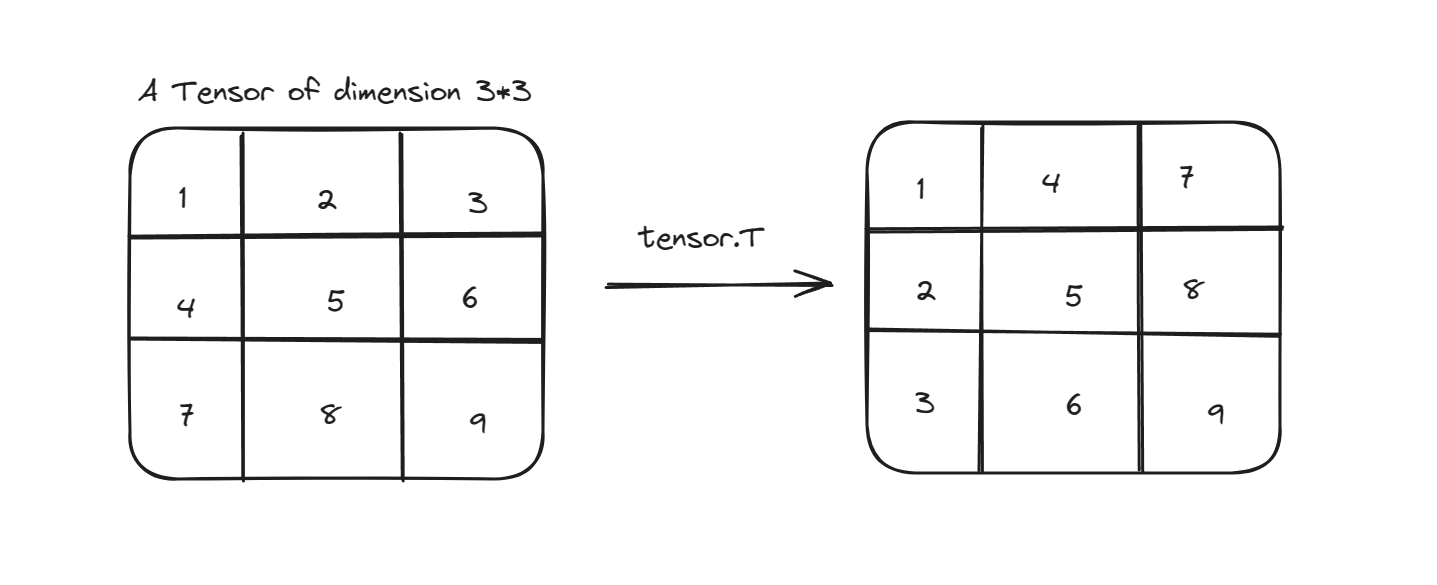

If `n` is the number of dimensions in `x`, `x.T` is equivalent to `x.permute(n-1, n-2, ..., 0)`

In [36]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
x.T

tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [38]:
x.shape

torch.Size([3, 3])

<a id="3dtranspose"></a>
### Transposing a Tensor more than 2 dimensions with `Tensor.mT`

The use of Tensor.T() on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error. 

To transpose batched of matrices we can use `Tensor.mT`:

Tensor.mT returns a view of this tensor with last two dimensions transposed. x.mT is equivalent to x.transpose(-2, -1)

### Tensor.mT

In [39]:
x = torch.tensor([[[1,2,3], [4,5,6], [7,8,9]],
                 [[10,11,12], [13,14,15], [16,17,18]]])
x.shape

torch.Size([2, 3, 3])

In [40]:
x.mT

tensor([[[ 1,  4,  7],
         [ 2,  5,  8],
         [ 3,  6,  9]],

        [[10, 13, 16],
         [11, 14, 17],
         [12, 15, 18]]])

<a id="permute"></a>
## Reversing dimensions of tensor with `torch.permute(input, dims)`

`torch.permute(input, dims)` method returns a view of the original tensor `input` with its dimensions permuted.

In [41]:
x = torch.rand(2, 3, 5)
x.size()

torch.Size([2, 3, 5])

In [42]:
torch.permute(x , (2, 0, 1)).size()

torch.Size([5, 2, 3])

In [49]:
x = torch.tensor([[[1,2,3], [4,5,6], [7,8,9]],
                 [[10,11,12], [13,14,15], [16,17,18]]])
print(x)
print(x.shape)
print("\nAfter tensor.permute(input, (dim1, dim2, .. , dimn))\n")
dim_reversed = x.permute(*torch.arange(x.ndim-1, -1, -1))
print(dim_reversed)
print(dim_reversed.shape)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]]])
torch.Size([2, 3, 3])

After tensor.permute(input, (dim1, dim2, .. , dimn))

tensor([[[ 1, 10],
         [ 4, 13],
         [ 7, 16]],

        [[ 2, 11],
         [ 5, 14],
         [ 8, 17]],

        [[ 3, 12],
         [ 6, 15],
         [ 9, 18]]])
torch.Size([3, 3, 2])


<a id="conjtranspose"></a>
### Conjucation and transposing 2D Tensor with `Tensor.H`

Returns a view of a matrix (2-D tensor) conjugated and transposed.

`x.H` is equivalent to `x.transpose(0, 1).conj()` for complex matrices and `x.transpose(0, 1)` for real matrices.

In [58]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)
print(f"\nx.transpose(0,1)\n{x.transpose(0,1)}")
print("x.H")
x.H

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

x.transpose(0,1)
tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])
x.H


tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

### Conjucation and transposing Tensor with more that 2 dimensions with `Tensor.mH` or `torch.adjoint(Tensor)`

Returns a view of the tensor sonjugated and with the last two dimensions transposed.

`x.adjoint()` is equivalent to `x.transpose(-2, -1).conj()` for complex tensors and to `x.transpose(-2, -1)` for real tensors.

In [59]:
x = torch.arange(4, dtype=torch.float)
A = torch.complex(x, x).reshape(2,2)
A

tensor([[0.+0.j, 1.+1.j],
        [2.+2.j, 3.+3.j]])

In [61]:
A.adjoint()

tensor([[0.-0.j, 2.-2.j],
        [1.-1.j, 3.-3.j]])

In [63]:
(A.adjoint() == A.mH).all()

tensor(True)

<a id="reshapeview"></a>
## Reshape and View Tensors

`torch.reshape(input, shape)` returns a tensor with the same data and number of elements as `input`, but wuth specified shape. When possible, the returned tensor will be a view of `input`. Otherwise, it will be a copy. Contiguous inputs with compatible strides can be reshaped wothout copying, but you should not depend on the copying vs. viewing behaviour.

In [65]:
a = torch.arange(4.)
a

tensor([0., 1., 2., 3.])

In [66]:
torch.reshape(a , (2,2))

tensor([[0., 1.],
        [2., 3.]])

In [69]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

`Tensor.view(*shape)` returns a new tensor with the same data as the self tensor but of a different `shape`.
The returned tensor shares the same data and must have the smae number of elements, but may have a different size. For a tensor to be viewed, the new view size must be compatible with it's original size and stride, i.e., each new view dimension must either by a subspace of an original dimension, or only span across original dimensions d, d+1,..,d+k that satisfy the following contiguity-like condition that for al $i = d,...,d+k-1$:
$$
    stride[i] = stride[i+1] * size[i+1]
$$
otherwise, it will not be possible to view `self` tensor as `shape` without copying it (e.g, via `contiguous()`).

When it is unclear whter a `view()` can be performed, it is advisable to use `reshape()`, which returns a view if the shapes are compatible, and copies (equivalent to calling `contiguous()`) otherwise.

In [77]:
my_torch.view(5,2), my_torch.view(2,5)

(tensor([[0, 1],
         [2, 3],
         [4, 5],
         [6, 7],
         [8, 9]]),
 tensor([[0, 1, 2, 3, 4],
         [5, 6, 7, 8, 9]]))

If we don't know the number of items before hand, `reshape()` is the better choice.

In [81]:
my_torch2 = torch.arange(10)
my_torch2

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [80]:
my_torch2 = my_torch2.reshape(2, -1)
my_torch2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

This is helpful when we have a huge tensor who's dimensions we doint know before hand.

In [82]:
my_torch2 = my_torch2.reshape(-1, 5)
my_torch2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

same things can be done with view

In [83]:
my_torch3 = torch.arange(10)
my_torch3

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [84]:
my_torch4 = my_torch3.view(2,5)
my_torch4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

`torch.reshape()` and `torch.view()` both copies the tensor, so change in original tensor results in a change in the reshaped or viewed tensor

In [4]:
my_torch6 = torch.arange(12)
print("my_torch6:")
print(my_torch6)
my_torch7_reshaped = my_torch6.reshape(3,4)
print("my_torch6.reshape(3,4):")
print(my_torch7_reshaped)
print("\nmy_torch6[11]=22\n")
my_torch6[11]=22
print("did my_torch7_reshaped[11] changed aswell?")
my_torch7_reshaped

my_torch6:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
my_torch6.reshape(3,4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

my_torch6[11]=22

did my_torch7_reshaped[11] changed aswell?


tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 22]])

<a id="slices"></a>
## Slices

In [9]:
my_torch7 = torch.arange(10)
my_torch8 = my_torch7.reshape(5,2)
my_torch8

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [10]:
my_torch8[:,1]

tensor([1, 3, 5, 7, 9])

In [11]:
my_torch8[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

# Summary

This was an introduction to Tensor along with the most common types of operations. In the next notebook we will go over some more tensor creation methods and after that dive into tensor math operations.